### Comparing the cases corpus to the political speeches dataset, the reuters dataset and the twitter dataset

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [124]:
df = pickle.load (open("pj_df_full.20190629_095112.pkl", "rb"))      # cases corpus
dfmo = pickle.load (open("pj_demo_dfmo_full.20190629_163240.pkl", "rb"))   # political speeches dataset
dfre = pickle.load(open("pj_dfre_full.20190629_115819.pkl", "rb"))   # reuters dataset
dftw = pickle.load(open("pj_dftw_full.20190630_005652.pkl", "rb"))   # twitter dataset

In [125]:
dfmo.head()

,jahr,leng,datum,speaker,nwords,ntoks,nverbs,npast,npresent,nfuture,...,nffuture,doc,antpast,antpresent,antfuture,antfpast,antfpresent,antffuture,ldeont,lmodal
M0001,0,13646,"April 25, 2007",McCain,2441,385,422,25,155,26,...,22,"""Today, I announce my candidacy for President ...",0.121359,0.752427,0.126214,0.185185,0.733333,0.081481,0.0,1.0
M0002,0,18408,"May 1, 2007",McCain,3095,561,468,42,195,6,...,28,"""Since the dawn of our republic, Americans hav...",0.172840,0.802469,0.024691,0.191558,0.717532,0.090909,0.0,17.0
M0003,0,17136,"May 21, 2007",McCain,2880,460,505,41,152,32,...,38,"""When our founding fathers signed the document...",0.182222,0.675556,0.142222,0.136808,0.739414,0.123779,0.0,2.0
M0004,0,13463,"June 18, 2007",McCain,2428,417,427,160,83,11,...,28,"""Thank you, Admiral Stewart, Secretary Peters,...",0.629921,0.326772,0.043307,0.496575,0.407534,0.095890,0.0,27.0
M0005,0,17063,"June 20, 2007",McCain,2766,451,429,31,174,17,...,38,"""It is pretty difficult for a politician to re...",0.139640,0.783784,0.076577,0.163701,0.701068,0.135231,0.0,13.0


In [126]:
print("size of cases corpus:", len(df), "  political speeches dataset:", len(dfmo), "  reuters dataset:", len(dfre), \
      "   twitter dataset:", len(dftw))

size of cases corpus: 5762   political speeches dataset: 251   reuters dataset: 10788    twitter dataset: 20000


In [127]:
df.columns
# npast, npresent, nfuture : absolute numbers of past, present, future tenses from POS tagging
# nfpast, nfpresent, nffuture : absolute number of focus past, focus present, focus future from LIWC
# antpast, antpresent, antfuture : fractions of past, present, future
# antfpast, antfpresent, antffutre : fractions of focus past, focus present, focus future

Index(['case_reversed', 'judge_id', 'year', 'log_cites', 'LastName',
       'FirstName', 'Gender', 'Pres', 'Party', 'nlets', 'nsents', 'nwords',
       'doc', 'ntoks', 'nverbs', 'npast', 'npresent', 'nfuture', 'antpast',
       'antpresent', 'antfuture', 'nfpast', 'nfpresent', 'nffuture',
       'antfpast', 'antfpresent', 'antffuture', 'ldeont', 'lmodal'],
      dtype='object')

### histograms showing different distribution of past tenses in the different document types

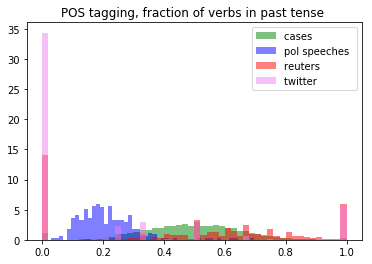

In [128]:
plt.hist(df["antpast"], bins = 50, alpha = 0.5, label = "cases ", color = 'g', density = 1)
plt.hist(dfmo["antpast"], bins = 50, alpha = 0.5, label = "pol speeches ", color = 'b',  density = 1)
plt.hist(dfre["antpast"], bins = 50, alpha = 0.5, label = "reuters ", color = 'r', density = 1)
plt.hist(dftw["antpast"], bins = 50, alpha = 0.5, label = "twitter ", color = 'violet', density = 1)
plt.title("POS tagging, fraction of verbs in past tense ")
plt.legend(loc='upper right')
plt.show()

###### narrowing range to (0.01,  0.9) to keep out the spikes at 0 and 1

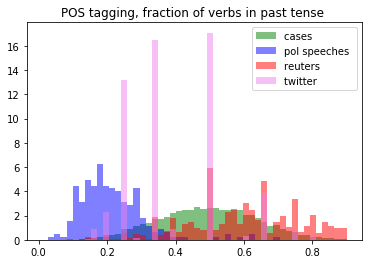

In [129]:
plt.hist(df["antpast"], bins = 50, alpha = 0.5, label = "cases ", range = (0.01,0.9), color = 'g', density = 1)
plt.hist(dfmo["antpast"], bins = 50, alpha = 0.5, label = "pol speeches ", range = (0.01,0.9), color = 'b', density = 1)
plt.hist(dfre["antpast"], bins = 50, alpha = 0.5, label = "reuters ", range = (0.01,0.9), color = 'r', density = 1)
plt.hist(dftw["antpast"], bins = 50, alpha = 0.5, label = "twitter ", range = (0.01,0.9), color = 'violet', density = 1)
plt.title("POS tagging, fraction of verbs in past tense ")
plt.legend(loc='upper right')
plt.show()

### now present tense

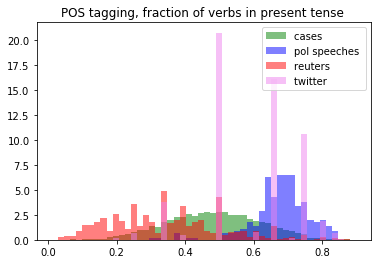

In [130]:
plt.hist(df["antpresent"], bins = 50, alpha = 0.5, label = "cases ", range = (0.01,0.9), color = 'g', density = 1)
plt.hist(dfmo["antpresent"], bins = 50, alpha = 0.5, label = "pol speeches ", range = (0.01,0.9), color = 'b', density = 1)
plt.hist(dfre["antpresent"], bins = 50, alpha = 0.5, label = "reuters ", range = (0.01,0.9), color = 'r', density = 1)
plt.hist(dftw["antpresent"], bins = 50, alpha = 0.5, label = "twitter ", range = (0.01,0.9), color = 'violet', density = 1)
plt.title("POS tagging, fraction of verbs in present tense ")
plt.legend(loc='upper right')
plt.show()

### future tense

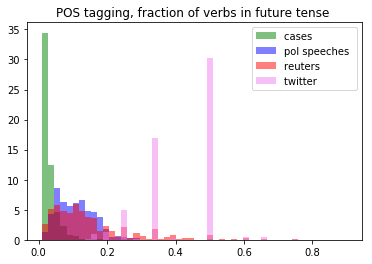

In [131]:
plt.hist(df["antfuture"], bins = 50, alpha = 0.5, label = "cases ", range = (0.01,0.9), color = 'g', density = 1)
plt.hist(dfmo["antfuture"], bins = 50, alpha = 0.5, label = "pol speeches ", range = (0.01,0.9), color = 'b', density = 1)
plt.hist(dfre["antfuture"], bins = 50, alpha = 0.5, label = "reuters ", range = (0.01,0.9), color = 'r', density = 1)
plt.hist(dftw["antfuture"], bins = 50, alpha = 0.5, label = "twitter ", range = (0.01,0.9), color = 'violet', density = 1)
plt.title("POS tagging, fraction of verbs in future tense ")
plt.legend(loc='upper right')
plt.show()

### LIWC  focus past, focus present, focus future all cases in the cases corpus

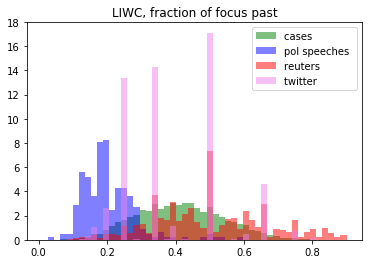

In [162]:
plt.hist(df["antfpast"], bins = 50, alpha = 0.5, label = "cases ", range = (0.01,0.9), color = 'g', density = 1)
plt.hist(dfmo["antfpast"], bins = 50, alpha = 0.5, label = "pol speeches ", range = (0.01,0.9), color = 'b', density = 1)
plt.hist(dfre["antfpast"], bins = 50, alpha = 0.5, label = "reuters ", range = (0.01,0.9), color = 'r', density = 1)
plt.hist(dftw["antfpast"], bins = 50, alpha = 0.5, label = "twitter ", range = (0.01,0.9), color = 'violet', density = 1)
plt.title("LIWC, fraction of focus past")
plt.legend(loc='upper right')
plt.show()

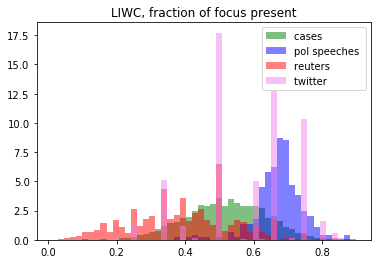

In [163]:
plt.hist(df["antfpresent"], bins = 50, alpha = 0.5, label = "cases ", range = (0.01,0.9), color = 'g', density = 1)
plt.hist(dfmo["antfpresent"], bins = 50, alpha = 0.5, label = "pol speeches ", range = (0.01,0.9), color = 'b', density = 1)
plt.hist(dfre["antfpresent"], bins = 50, alpha = 0.5, label = "reuters ", range = (0.01,0.9), color = 'r', density = 1)
plt.hist(dftw["antfpresent"], bins = 50, alpha = 0.5, label = "twitter ", range = (0.01,0.9), color = 'violet', density = 1)
plt.title("LIWC, fraction of focus present")
plt.legend(loc='upper right')
plt.show()

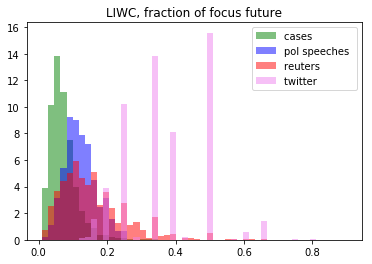

In [164]:
plt.hist(df["antffuture"], bins = 50, alpha = 0.5, label = "cases ", range = (0.01,0.9), color = 'g', density = 1)
plt.hist(dfmo["antffuture"], bins = 50, alpha = 0.5, label = "pol speeches ", range = (0.01,0.9), color = 'b', density = 1)
plt.hist(dfre["antffuture"], bins = 50, alpha = 0.5, label = "reuters ", range = (0.01,0.9), color = 'r', density = 1)
plt.hist(dftw["antffuture"], bins = 50, alpha = 0.5, label = "twitter ", range = (0.01,0.9), color = 'violet', density = 1)
plt.title("LIWC, fraction of focus future")
plt.legend(loc='upper right')
plt.show()

### republican vs democratic, cases corpus

In [132]:
df_republican = df.loc[ df["Party"] == "Republican" ]
df_democratic = df.loc[ df["Party"] == "Democratic" ]

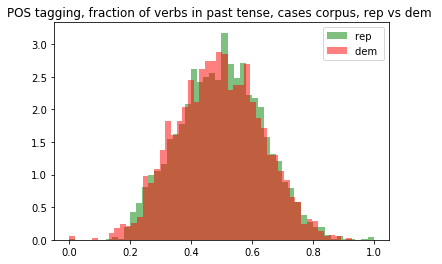

In [133]:
plt.hist(df_republican["antpast"], bins = 50, alpha = 0.5, label = "rep ",  color = 'g', density = 1)
plt.hist(df_democratic["antpast"], bins = 50, alpha = 0.5, label = "dem ",  color = 'r', density = 1)
plt.title("POS tagging, fraction of verbs in past tense, cases corpus, rep vs dem ")
plt.legend(loc='upper right')
plt.show()

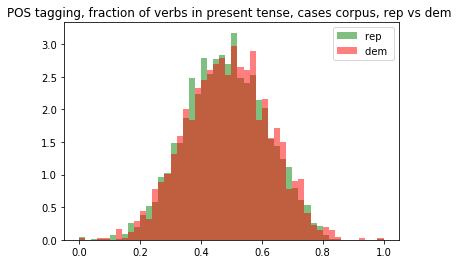

In [134]:
plt.hist(df_republican["antpresent"], bins = 50, alpha = 0.5, label = "rep ",  color = 'g', density = 1)
plt.hist(df_democratic["antpresent"], bins = 50, alpha = 0.5, label = "dem ",  color = 'r', density = 1)
plt.title("POS tagging, fraction of verbs in present tense, cases corpus, rep vs dem ")
plt.legend(loc='upper right')
plt.show()

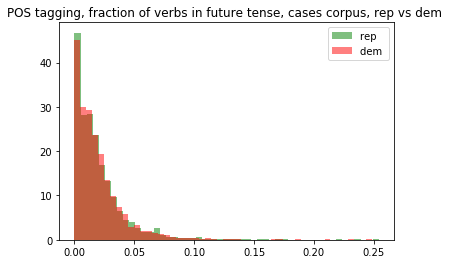

In [135]:
plt.hist(df_republican["antfuture"], bins = 50, alpha = 0.5, label = "rep ",  color = 'g', density = 1)
plt.hist(df_democratic["antfuture"], bins = 50, alpha = 0.5, label = "dem ",  color = 'r', density = 1)
plt.title("POS tagging, fraction of verbs in future tense, cases corpus, rep vs dem ")
plt.legend(loc='upper right')
plt.show()

### McCain vs Obama, political speeches, more rugged because corpus size smaller than in the cases corpus

In [136]:
dfmo_McCain = dfmo.loc[ dfmo["speaker"] == "McCain" ]
dfmo_Obama = dfmo.loc[ dfmo["speaker"] == "Obama" ]

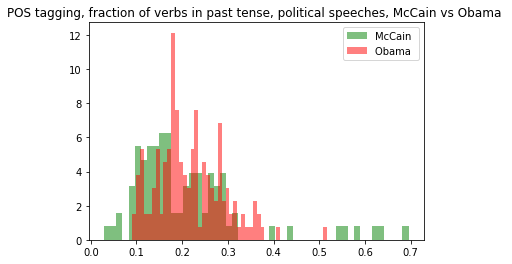

In [137]:
plt.hist(dfmo_McCain["antpast"], bins = 50, alpha = 0.5, label = "McCain ",  color = 'g', density = 1)
plt.hist(dfmo_Obama["antpast"], bins = 50, alpha = 0.5, label = "Obama ",  color = 'r', density = 1)
plt.title("POS tagging, fraction of verbs in past tense, political speeches, McCain vs Obama ")
plt.legend(loc='upper right')
plt.show()

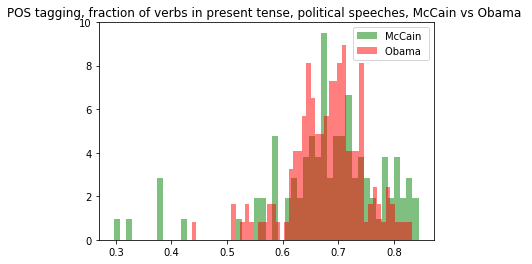

In [138]:
plt.hist(dfmo_McCain["antpresent"], bins = 50, alpha = 0.5, label = "McCain ",  color = 'g', density = 1)
plt.hist(dfmo_Obama["antpresent"], bins = 50, alpha = 0.5, label = "Obama ",  color = 'r', density = 1)
plt.title("POS tagging, fraction of verbs in present tense, political speeches, McCain vs Obama ")
plt.legend(loc='upper right')
plt.show()

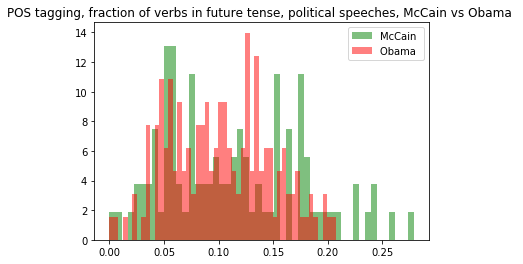

In [139]:
plt.hist(dfmo_McCain["antfuture"], bins = 50, alpha = 0.5, label = "McCain ",  color = 'g', density = 1)
plt.hist(dfmo_Obama["antfuture"], bins = 50, alpha = 0.5, label = "Obama ",  color = 'r', density = 1)
plt.title("POS tagging, fraction of verbs in future tense, political speeches, McCain vs Obama ")
plt.legend(loc='upper right')
plt.show()

### modals 

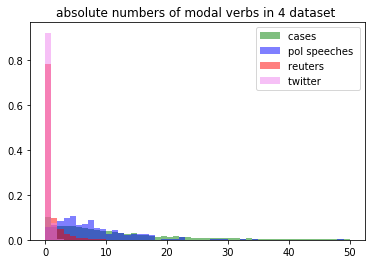

In [140]:
plt.hist(df["lmodal"], bins = 50, alpha = 0.5, label = "cases ", range = (0,50), color = 'g', density = 1)
plt.hist(dfmo["lmodal"], bins = 50, alpha = 0.5, label = "pol speeches ",  range = (0,50), color = 'b', density = 1)
plt.hist(dfre["lmodal"], bins = 50, alpha = 0.5, label = "reuters ",  range = (0,50), color = 'r', density = 1)
plt.hist(dftw["lmodal"], bins = 50, alpha = 0.5, label = "twitter ",  range = (0,50), color = 'violet', density = 1)
plt.title("absolute numbers of modal verbs in 4 dataset ")
plt.legend(loc='upper right')
plt.show()

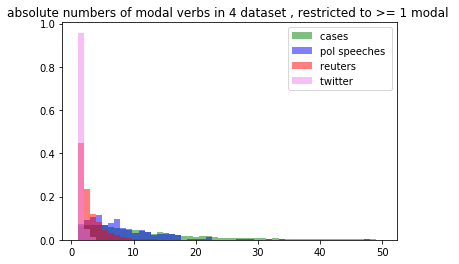

In [165]:
plt.hist(df["lmodal"], bins = 50, alpha = 0.5, label = "cases ", range = (1,50), color = 'g', density = 1)
plt.hist(dfmo["lmodal"], bins = 50, alpha = 0.5, label = "pol speeches ",  range = (1,50), color = 'b', density = 1)
plt.hist(dfre["lmodal"], bins = 50, alpha = 0.5, label = "reuters ",  range = (1,50), color = 'r', density = 1)
plt.hist(dftw["lmodal"], bins = 50, alpha = 0.5, label = "twitter ",  range = (1,50), color = 'violet', density = 1)
plt.title("absolute numbers of modal verbs in 4 dataset , restricted to >= 1 modal ")
plt.legend(loc='upper right')
plt.show()

### deontic future

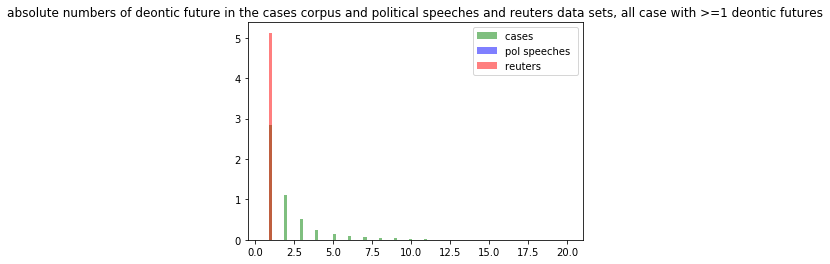

In [161]:
plt.hist(df["ldeont"], bins = 100, alpha = 0.5, label = "cases ", range = (0.5,20), color = 'g', density = 1)
plt.hist(dfmo["ldeont"], bins = 100, alpha = 0.5, label = "pol speeches ",  range = (0.5,20), color = 'b', density = 1)
plt.hist(dfre["ldeont"], bins = 100, alpha = 0.5, label = "reuters ",  range = (0.5,20), color = 'r', density = 1)
plt.title("absolute numbers of deontic future in the cases corpus and political speeches and reuters data sets, all case with >=1 deontic futures")
plt.legend(loc='upper right')
plt.show()

###  statistical tests

In [142]:
from scipy.stats import ttest_ind, chisquare

##### excerpt from scipy.stats.ttest_ind :

We can use this test, if we observe two independent samples from the same or different population .... 
The test measures wther the average (expected) value differs significantly across samples. 
If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of 
identical average. If the p-value is smaller than the threshold, e.g. 1% , r% or 10%, then we reject the null 
hypothesis of equal averages. The two samples does not need to have the same length.

##### excerpt from scipy.chisquare1:
Tests the null hypothesis that the categorical data has the given frequencies. (f_obs, f_exp, ddof = 0, axis = 0)
The p-value is computed using a chi-squared distribution with k - 1- ddof degrees of freedom, where k = the number of observed frequencies.

#### t-test  on independent samples,  equality of means

##### POS tagging

In [143]:
ttest_ind ( df["antpast"], dfmo["antpast"], equal_var=False)
# cases corpus vs political speeches dataset, past tense
# large t-test statistics and small p value indicate  Null hypothsis of equal means can be rejected at 5 % confidence

Ttest_indResult(statistic=41.80503468124304, pvalue=2.3401030350428614e-130)

In [144]:
ttest_ind ( df["antpast"], dfre["antpast"], equal_var=False)
# cases corpus vs reuters dataset, past tense
# small t-test statistics and large p value indicate  Null hypothsis of equal means cannot be rejected at 5 % confidence

Ttest_indResult(statistic=1.8267315674071143, pvalue=0.06775843209156282)

In [145]:
ttest_ind ( df["antpast"], dftw["antpast"], equal_var=False)
# cases corpus vs twitter dataset, past tense
# large t-test statistics and small p value indicate  Null hypothsis of equal means can be rejected at 5 % confidence

Ttest_indResult(statistic=91.92985432858158, pvalue=0.0)

In [146]:
ttest_ind ( df["antpresent"], dfmo["antpresent"], equal_var=False)
# cases corpus vs political speeches dataset, present tense
# large t-test statistics and small p value indicate  Null hypothsis of equal means can be rejected at 5 % confidence

Ttest_indResult(statistic=-35.70922065118363, pvalue=1.1538825443172855e-115)

In [147]:
ttest_ind ( df["antpresent"], dfre["antpresent"], equal_var=False)
# cases corpus vs reuters dataset, present tense
# large t-test statistics and small p value indicate  Null hypothsis of equal means can be rejected at 5 % confidence

Ttest_indResult(statistic=46.464429707848154, pvalue=0.0)

In [148]:
ttest_ind ( df["antpresent"], dftw["antpresent"], equal_var=False)
# cases corpus vs twitter dataset, present tense
# large t-test statistics and small p value indicate  Null hypothsis of equal means can be rejected at 5 % confidence

Ttest_indResult(statistic=-28.6642409416456, pvalue=9.187887769004956e-178)

In [149]:
ttest_ind ( df["antfuture"], dfmo["antfuture"], equal_var=False)
# cases corpus vs political speeches dataset, future tense
# large t-test statistics and small p value indicate  Null hypothsis of equal means can be rejected at 5 % confidence

Ttest_indResult(statistic=-24.835005758600865, pvalue=5.061667469702257e-71)

In [150]:
ttest_ind ( df["antfuture"], dfre["antfuture"], equal_var=False)
# cases corpus vs reuters dataset, future tense
# large t-test statistics and small p value indicate  Null hypothsis of equal means can be rejected at 5 % confidence

Ttest_indResult(statistic=-17.32524369785792, pvalue=1.1888475374197356e-66)

In [151]:
ttest_ind ( df["antfuture"], dftw["antfuture"], equal_var=False)
# cases corpus vs twitter dataset, future tense
# large t-test statistics and small p value indicate  Null hypothsis of equal means can be rejected at 5 % confidence

Ttest_indResult(statistic=-31.87666973063684, pvalue=1.6819616626660936e-218)

##### LIWC

In [152]:
ttest_ind ( df["antfpast"], dfmo["antfpast"], equal_var=False)
# LIWC past focus, cases corpus vs political speeches dataset
# Null hypothesis of equal means rejected

Ttest_indResult(statistic=37.79223619705672, pvalue=9.2923379440385e-121)

In [153]:
ttest_ind ( df["antfpast"], dfre["antfpast"], equal_var=False)
# LIWC past focus, cases corpus vs reuters dataset
# Null hypothesis of equal means rejected

Ttest_indResult(statistic=-5.271916883937974, pvalue=1.3676315676507457e-07)

In [154]:
ttest_ind ( df["antfpast"], dftw["antfpast"])
# LIWC past focus, cases corpus vs twitter dataset
# Null hypothesis of equal means rejected

Ttest_indResult(statistic=57.21681586041814, pvalue=0.0)

In [155]:
ttest_ind ( df["antfpresent"], dfmo["antfpresent"], equal_var=False)
# LIWC present focus, cases corpus vs political speeches dataset
# Null hypothesis of equal means rejected

Ttest_indResult(statistic=-32.98153587517679, pvalue=2.243510965900292e-108)

In [156]:
ttest_ind ( df["antfpresent"], dfre["antfpresent"], equal_var=False)
# LIWC present focus, cases corpus vs reuters dataset
# Null hypothesis of equal means rejected

Ttest_indResult(statistic=59.892085814353926, pvalue=0.0)

In [157]:
ttest_ind ( df["antfpresent"], dftw["antfpresent"], equal_var=False)
# LIWC present focus, cases corpus vs twitter dataset
# Null hypothesis of equal means rejected

Ttest_indResult(statistic=-7.357555442287563, pvalue=1.9298114589046785e-13)